# Mapping Bad Drivers

## A little motivation

So my wife and I often talk about the quality of driving in New Jersey. She's from Texas, and I grew up driving in New Jersey. Conveniently, fivethrityeight has [published an article](http://fivethirtyeight.com/datalab/which-state-has-the-worst-drivers/) and [collected data](https://github.com/fivethirtyeight/data/tree/master/bad-drivers) about bad driving.

Now, we obviously can't surmise much from this data (and certainly not much more than was already reported in the original story). And although bad driving is correlated with the vehicular fatality rate, we don't have a perfect correspondence. Still, though, it would be fun to visualize the results.

So let's see what the data have to say.

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
from IPython.display import Image

# so I don't have to sign in to use plotly
init_notebook_mode(connected=True)

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bad-drivers/bad-drivers.csv')
df.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


It looks like all data are normalized by mileage rather than by per capita or by number of people with driver's licenses. Also, the states are named rather than encoded, so we'll need to add another column of the state codes.

In [2]:
state_codes = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

# reassign the index with codes, remove the full state name
df.index = df['State'].replace(state_codes)
state_names = df.pop('State')

# shorten the column names
df.columns = ['drivers', 'speeding', 'drinking', 'not_distracted', 'first_time', 'premiums', 'losses']

In [3]:
df.describe()

,drivers,speeding,drinking,not_distracted,first_time,premiums,losses
count,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000
mean,15.790196,31.725490,30.686275,85.921569,88.72549,886.957647,134.493137
std,4.122002,9.633438,5.132213,15.158949,6.96011,178.296285,24.835922
min,5.900000,13.000000,16.000000,10.000000,76.00000,641.960000,82.750000
25%,12.750000,23.000000,28.000000,83.000000,83.50000,768.430000,114.645000
50%,15.600000,34.000000,30.000000,88.000000,88.00000,858.970000,136.050000
75%,18.500000,38.000000,33.000000,95.000000,95.00000,1007.945000,151.870000
max,23.900000,54.000000,44.000000,100.000000,100.00000,1301.520000,194.780000


## Speeding deaths: how many per billion miles driven, per state?

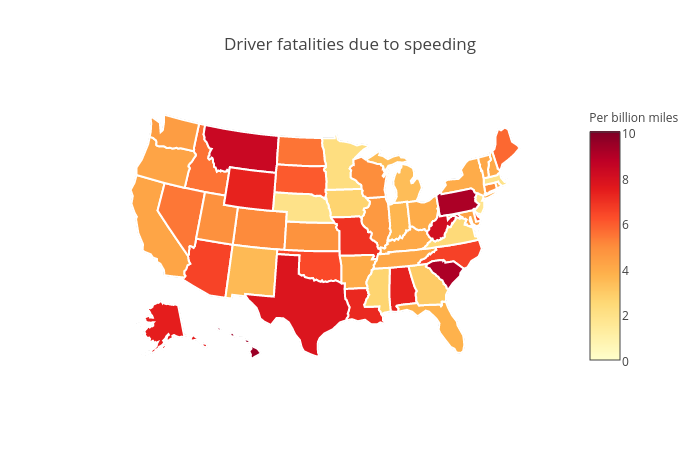

In [4]:
df['speeding_fatalities'] = df.speeding * df.drivers / 100

data = [dict(type='choropleth', 
             locations=df.index, 
             locationmode='USA-states',
             colorscale='YlOrRd', 
             zmin=0.0,
             zmax=10.0,
             reversescale=True,
             z=df.speeding_fatalities,
             marker={'line': {'color': 'rgb(255, 255, 255)', 'width': 2}}, 
             colorbar={'title': 'Per billion miles'})]

layout = dict(title='Driver fatalities due to speeding',
              geo={'scope': 'usa', 
                   'projection': {'type': 'albers usa'}, 
                   'showlakes': False,
                   'lakecolor': 'rgb(255, 255, 255)'})

fig = dict(data=data, layout=layout)

#iplot(fig, image='png')
Image('images/speeding.png')

We can sort them in increasing order by the above metric:

In [5]:
df.sort_values(by='speeding_fatalities', inplace=True)

print('                    Driver fatalities due to speeding')
print('                         State   Deaths   Rank')
for i, [code, fatalities] in enumerate(zip(df.index, df.speeding_fatalities)):
    if i % 3 == 0:
        string_row = ''
    else:
        string_row += '  |  '
    string_row += '  {:s}    {:5.2f}    {:2d} '.format(code, fatalities, i + 1)
    
    if i % 3 == 2:
        print(string_row)

                    Driver fatalities due to speeding
                         State   Deaths   Rank
  NJ     1.79     1   |    MA     1.89     2   |    NE     1.94     3 
  DC     2.01     4   |    MN     2.21     5   |    VA     2.41     6 
  MS     2.64     7   |    IA     2.67     8   |    GA     2.96     9 
  MI     3.38    10   |    NM     3.50    11   |    IN     3.62    12 
  FL     3.76    13   |    RI     3.77    14   |    NY     3.94    15 
  OH     3.95    16   |    AR     4.03    17   |    NH     4.06    18 
  KY     4.07    19   |    VT     4.08    20   |    TN     4.09    21 
  CA     4.20    22   |    OR     4.22    23   |    MD     4.25    24 
  WA     4.45    25   |    IL     4.61    26   |    KS     4.81    27 
  UT     4.86    28   |    WI     4.97    29   |    CT     4.97    30 
  CO     5.03    31   |    NV     5.44    32   |    ND     5.50    33 
  ID     5.51    34   |    ME     5.74    35   |    SD     6.01    36 
  DE     6.16    37   |    OK     6.37    38   

Looks like New Jersey is beating Texas, \#1 versus \#46. That seems amazing given how often NJ drivers speed, and especially in contrast to PA drivers (\#50), whose driving we consider unbearably slow. Also, Massachusetts sitting at \#2 boggles my mind.

## Non-distracted driver fatalities

I don't know whether to interpret these as simply bad drivers or as victims of other bad drivers. I'll just assume that, if they did not have any distractions, they had no excuse (i.e., were at fault).

Let's take a look at the distribution of (percentages of) fatal accidents that were not caused by distracted driving.

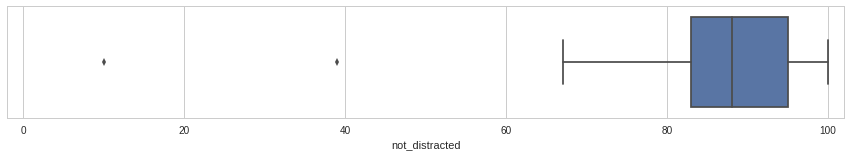

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style='whitegrid')

fig = plt.figure(figsize=(15, 2))
ax = fig.add_subplot(111)
ax.set_xlim(-2,102)

sns.boxplot(x='not_distracted', data=df, ax=ax)

Mississippi's number looks like it might be off (10% of accidents *not* due to distractions... it should probably be 90%). Wisconsin's is also extremely low (39%). Both of these are evident as outliers in the data, so let's just blank them.



In [7]:
import numpy as np

df.not_distracted.ix['MS'] = np.nan
df.not_distracted.ix['WI'] = np.nan

/home/john/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



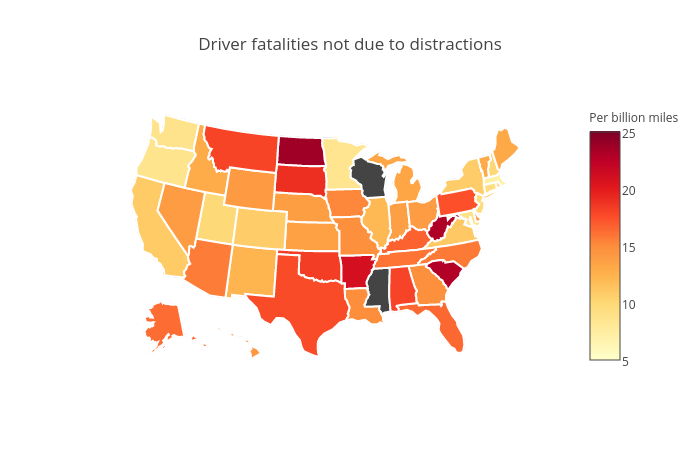

In [8]:
df['not_distracted_fatalities'] = df.not_distracted * df.drivers / 100

data = [dict(type='choropleth', 
             locations=df.index, 
             locationmode='USA-states',
             colorscale='YlOrRd', 
             zmin=5.0,
             zmax=25.0,
             reversescale=True,
             z=df.not_distracted_fatalities,
             marker={'line': {'color': 'rgb(255, 255, 255)', 'width': 2}}, 
             colorbar={'title': 'Per billion miles'})]

layout = dict(title='Driver fatalities not due to distractions',
              geo={'scope': 'usa', 
                   'projection': {'type': 'albers usa'}, 
                   'showlakes': False,
                   'lakecolor': 'rgb(255, 255, 255)'})

fig = dict(data=data, layout=layout)

#iplot(fig, image='png')
Image('images/not_distractions.png')

It's interesting that the Northeast and West coast have good driving (if, indeed, I am correctly equating low numbers of non-distracted driving with good driving). And then Minnesota, despite bordering North Dakota (which has the highest per-mileage rate), is home of the third lowest rate. Washington D.C. has the lowest, and Massachusetts the second-lowest.

In [9]:
df.sort_values(by='not_distracted_fatalities', inplace=True)

print('                 Driver fatalities not due to distractions')
print('                         State   Deaths   Rank')
for i, [code, fatalities] in enumerate(zip(df.index, df.not_distracted_fatalities)):
    
    if i % 3 == 0:
        string_row = ''
    else:
        string_row += '  |  '
    string_row += '  {:s}    {:5.2f}    {:2d} '.format(code, fatalities, i + 1)
    
    if i % 3 == 2:
        print(string_row)
    

                 Driver fatalities not due to distractions
                         State   Deaths   Rank
  DC     5.90     1   |    MA     7.13     2   |    MN     8.45     3 
  OR     8.58     4   |    WA     8.69     5   |    MD     8.88     6 
  CT     9.40     7   |    NJ     9.63     8   |    UT     9.94     9 
  NH    10.09    10   |    RI    10.21    11   |    CO    10.74    12 
  NY    10.82    13   |    CA    10.92    14   |    VA    11.05    15 
  IL    12.03    16   |    NM    12.33    17   |    ID    13.01    18 
  VT    13.06    19   |    ME    13.14    20   |    MI    13.39    21 
  KS    13.71    22   |    IN    13.78    23   |    NE    13.86    24 
  OH    13.96    25   |    NV    13.96    26   |    WY    14.09    27 
  DE    14.09    28   |    HI    14.35    29   |    MO    14.81    30 
  GA    14.82    31   |    LA    14.96    32   |    IA    15.23    33 
  AZ    15.62    34   |    NC    15.79    35   |    TN    15.99    36 
  AK    16.29    37   |    FL    16.47    

### Drinking and driving

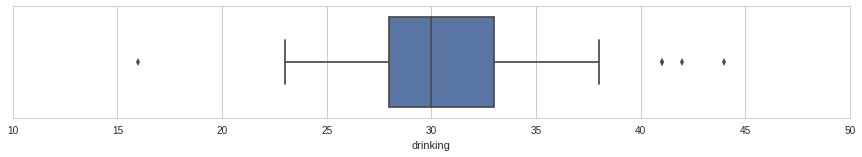

In [10]:
fig = plt.figure(figsize=(15, 2))
ax = fig.add_subplot(111)
ax.set_xlim(10,50)

sns.boxplot(x='drinking', data=df, ax=ax)

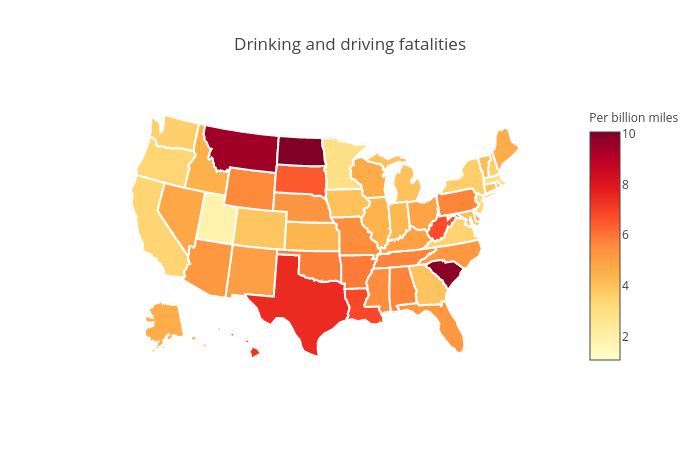

In [11]:
df['alcohol_fatalities'] = df.drinking * df.drivers / 100


data = [dict(type='choropleth', 
             locations=df.index, 
             locationmode='USA-states',
             colorscale='YlOrRd', 
             zmin=1.0,
             zmax=10.0,
             reversescale=True,
             z=df.alcohol_fatalities,
             marker={'line': {'color': 'rgb(255, 255, 255)', 'width': 2}}, 
             colorbar={'title': 'Per billion miles'})]

layout = dict(title='Drinking and driving fatalities',
              geo={'scope': 'usa', 
                   'projection': {'type': 'albers usa'}, 
                   'showlakes': False,
                   'lakecolor': 'rgb(255, 255, 255)'})

fig = dict(data=data, layout=layout)

#iplot(fig, image='png')
Image('images/drinking.png')

Looks like Utah is the safe haven here... it makes sense, as the Church of Latter-day Saints forbids their members from alcohol consumption.

## Ratio of insurance premiums to losses

Finally, let's take a look at the premiums and losses charged and paid by insurance companies. Obviously, it can be impacted by a lot of different things, such as the cost of living in a state, the non-fatal accident rate, etc.

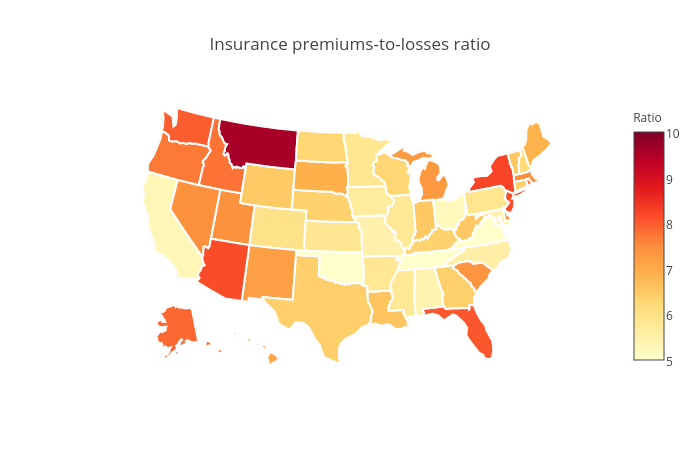

In [12]:
data = [dict(type='choropleth', 
             locations=df.index, 
             locationmode='USA-states',
             colorscale='YlOrRd', 
             zmin=5.0,
             zmax=10.0,
             reversescale=True,
             z=df.premiums / df.losses,
             marker={'line': {'color': 'rgb(255, 255, 255)', 'width': 2}}, 
             colorbar={'title': 'Ratio'})]

layout = dict(title='Insurance premiums-to-losses ratio',
              geo={'scope': 'usa', 
                   'projection': {'type': 'albers usa'}, 
                   'showlakes': False,
                   'lakecolor': 'rgb(255, 255, 255)'})

fig = dict(data=data, layout=layout)

#iplot(fig, image='png')
Image('images/insurance.png')

## Conclusions

Okay, so maybe I just wanted to learn how to use [Plotly](https://plot.ly/python/). But still, it's nice to be able to visualize data over the entire United States by using these *choropleth* maps. And I totally feel justified defending the aggressive driving of my fellow New Jerseyans.